# Python Tutorial

## Basic Python

We are using **Jupyter Notebook** as an interface for Python programming. This html page is converted from a Notebook; you can download the source file by clicking the download button on the upper right corner and choose the .ipynb format. If you are reading this inside the notebook, you may modify and play with the commands.

### Notebook editor

A Jupyter Notebook contains three types of cells: Code, Markdown, and Raw. You can add a cell and change its type by choosing from the menu bar on top.

This is a `Markdown` cell (see basic Markdown syntax [here](https://www.markdownguide.org/basic-syntax/)). Double click to edit its content, then press "Shift+Enter" to display it.

Below is a `Code` cell. Press "Shift+Enter" to execute the codes inside the cell.

In [1]:
print("Hello World!")    # everything after the `#` sign is comment

Hello World!


We can format the string by passing it as a variable.

In [2]:
s = "Hello World!"    # assign string to variable s
print(f'{s} from Python')    # s will be replaced by its value

Hello World! from Python


### Variable types and operations

Python variables are "pointers"; we can assign any data type to a variable without having to define the type.

In [3]:
x = 17           # x is an integer
y = 2.3          # y is a floating number
z = 'hello'      # z is a string
l = [1, 2, 3]    # l is a list

Some basic operations on these variables are as follows.

In [4]:
print(f'{x} / 2 = {x/2}')    # single slash division will convert integers to float
print(f'{x} // 2 = {x//2}')    # double slash gives integer division, i.e. quotient
print(f'{x} % 2 = {x%2}')    # percentage sign gives remainder of integer division

17 / 2 = 8.5
17 // 2 = 8
17 % 2 = 1


In [5]:
x != 20    # unequal to

True

In [6]:
(x > 20) or (x == 17)    # logical operators: and, or

True

In [7]:
l.append(4)    # add item to list
n = len(l)    # get length of list
print(f'list {l} has length {n}.')

list [1, 2, 3, 4] has length 4.


In [8]:
a = l[0]    # retrieve element of list
print(a)

1


Note that Python **indices start from 0**.

In [9]:
l * 3    # one can multiply list by number

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

In [10]:
l + l    # or add two lists

[1, 2, 3, 4, 1, 2, 3, 4]

In [11]:
(z + " world. ") * 5    # string is treated like a list of characters

'hello world. hello world. hello world. hello world. hello world. '

In [12]:
list(z)

['h', 'e', 'l', 'l', 'o']

### Control flow

Basic controls include `if` and `for` statements. Notice that Python uses **indentation** to group code blocks.

In [13]:
x = 7
if x == False:    # 0 equals False, otherwise True
    print(f'{x} is zero')
elif x > 0:
    print(f'{x} is positive')
elif x in l:    # check if an element is in a list
    print(f'{x} belongs to {l}')
else:
    print(f'{x} not found.')

7 is positive


Here is a `for` loop. A `while` loop would be similar.

In [14]:
n = 10    # number of iterations in the `for` loop below
for i in range(n):    # range() is a built-in function that returns an iterator
    print(f"Hello World #{i}")    # in each iteration i will take on a new value incremented by 1
    if i > 5:
        break    # break out of loop, jumping to codes below this `for` block
    else:
        continue    # skip to next iteration, ignoring anything below this `if` block
    print("This line will not be printed.")    # this line will be skipped because of the line above
else:    # this `else` is paired with the `for` statement
    print('Finished printing the full list.')    # this will be executed if the `for` loop completes normally
print('The `for` loop has ended.')    # this will always be executed as it is outside the `for` loop

Hello World #0
Hello World #1
Hello World #2
Hello World #3
Hello World #4
Hello World #5
Hello World #6
The `for` loop has ended.


You are welcome to change the number `n` in the above code and see what happens. Try to understand why the output looks the way it is.

Python allows you to loop over elements of any list, which are not necessarily integers. Note that the elements of a Python list do not even have to be of the same variable type.

In [15]:
mixed = [x, y, z]    # these variables as defined above are of different types
for e in mixed:    # for each element `e` in the list `mixed`
    print(e, type(e))    # the function `type` returns the variable type

7 <class 'int'>
2.3 <class 'float'>
hello <class 'str'>


The above `for` loop is equivalent to one using an index:

In [16]:
for i in range(len(mixed)):
    e = mixed[i]
    print(e, type(e))

7 <class 'int'>
2.3 <class 'float'>
hello <class 'str'>


```{admonition} Exercise
:class: tip

**Find prime numbers:**  
Let us use the basic operations we learned so far to carry out a simple task: finding all prime numbers below 100.
```

````{admonition} Solution
:class: note, dropdown

By definition, a prime number cannot be divided by any smaller numbers. Therefore, for a given number $n$, we can check if it is a prime by trying to divide it with all numbers smaller than it. As soon as we find one smaller number that divides $n$, we will know that $n$ is not a prime. We will then throw it out and check the next number $n+1$. But if no smaller number divides $n$, then we know that $n$ is prime and will store it in our list of primes. This line of reasoning can be translated into code as follows.

```{code-block}
prime_list = []    # create an empty list to store primes
for n in range(1,100):    # check every n in the range 1 to 99 (note that 100 is excluded!)
    for m in range(2,n):    # check every m smaller than n
        # print(n, m, n%m)    # uncomment this line to see what is going on through the loops
        if n%m == 0:    # the % operator calculates the remainder from integer division; check if remainder is 0
            break    # end the `for` loop because there is no need to check other m
    else:    # this is executed only if we did not `break` from the loop, which means no m divides n
        prime_list.append(n)    # add n to our list of primes
print(prime_list)
```

Can you find ways to improve this algorithm?
````

## Functions and Classes

To make codes modular, we can define a block of codes as a *function*, or *class* to be more stylish, so that we can reuse it later.

### Defining functions

A *function* takes certain inputs, does certain operations, and returns certain outputs. Defining functions in Python is very similar to that in other languages, except for the convenience that we do not have to explicitly state the variable types of inputs or outputs.

As an example, let us define a function that calculates the first $N$ Fibonacci numbers. By definition, these numbers are generated by the recursive relation
\begin{equation*}
F_{n+1} = F_{n} + F_{n-1}
\end{equation*}
starting from $F_0 = 0$ and $F_1 = 1$. To get the $N$-th Fibonacci number, we need to iterate the recursion $N-1$ times.

In [17]:
def fibonacci(N):    # here `fibonacci` is the function name, `N` is the input (need not specify data type)
    """
    generate the first N Fibonacci numbers.
    input:
    N: integer expected, number of Fibonacci numbers to calculate.
    output:
    fibo_list: a list of Fibonacci numbers.
    """
    fibo_list = [0, 1]    # list to store Fibonacci numbers
    a, b = 0, 1    # assign values of a, b as a pair (Python "tuple")
    while len(fibo_list) < N:    # use `while` loop to ensure that we get N numbers
        a, b = b, a+b    # carry out recursion by reassigning the value of a with b and b with a+b
        fibo_list.append(b)    # store the next Fibonacci number
    return fibo_list[:N]    # return list as output (need not specify data type)

Notice how we assigned values of a, b simultaneously, using Python *tuple*. A tuple is an ordered set, e.g., `(1, 2, 3)`, where the parenthesis is optional. The elements of the tuple on the right hand side, `(b, a+b)`, are evaluated simultaneously and then assigned to the left hand side. Had we not used tuple, this step would have required another auxiliary variable, e.g., `c = a + b; a = b; b = c`.

Let us test our function by executing it with an *argument*, say $N = 10$.

In [18]:
fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### Python classes

As an object-oriented programming language, an important strength of Python lies in the use of class objects. A *class* is like a user-defined variable type that has its own attributes and methods.

We can define a class as follows.

In [19]:
class Fibonacci:    # here `Fibonacci` is the class name
    """
    generate Fibonacci numbers.
    """
    
    def __init__(self):    # there is at least one input that is `self`
        """
        initialize the class object by defining internal variables.
        """
        self.a = 0    # current value of lower number
        self.b = 1    # current value of higher number
        self.fibo_list = [0, 1]    # list to store calculated numbers
    
    def next_num(self):    # define an internal function (a "method" of the class object)
        """
        calculate the next number.
        output:
        b: int, next Fibonacci number.
        """
        self.a, self.b = self.b, self.a + self.b
        self.fibo_list.append(self.b)
        return self.b
    
    def find(self, N):    # functions can have other inputs besides `self`
        """
        find the first N numbers.
        input:
        N: int, number of Fibonacci numbers to find.
        output:
        fibo_list: the list of first N Fibonacci numbers.
        """
        while len(self.fibo_list) < N:    # if not enough numbers are already calculated
            self.next_num()    # call the class's own method to calculate the next number
        return self.fibo_list[:N]    # return the first N numbers

Now let us create an **instance** of the class and test its method.

In [20]:
fibo1 = Fibonacci()
fibo1.find(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

So far it works just like the function we defined above. The advantage of defining it as a *class* instead of a *function* is that, while a function will be "forgotten" after use, an *instance* of the class will continue to exist as an object (like a variable), which can be called later. For example, if we now want to calculate more Fibonacci numbers, we can simply call the class object again.

In [21]:
fibo1.next_num()

55

In [22]:
fibo1.find(15)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

These numbers are saved internally inside the class object `fibo1`. When we calculate more numbers, we do not have to repeat our calculations before, and can simply continue to calculate new numbers. This is unlike the function `fibonacci()` defined above, for which we always have to start over from the beginning. For example, our class object may have already calculated and stored more numbers than we need, so it would simply return the stored numbers.

In [23]:
print(fibo1.fibo_list)    # this is the current list of numbers already calculated and stored

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


In [24]:
fibo1.find(5)    # it will return the first few stored numbers without having to recalculate

[0, 1, 1, 2, 3]

```{admonition} Exercise
:class: tip

**Write a class for finding prime numbers:**  
We have already been able to find the prime numbers using `for` loops. Now let us package our codes into a class, so that it stores those numbers and can calculate new ones if needed.
```

````{admonition} Solution
:class: note, dropdown

Here is the code:
```{code-block}
class Prime:
    """
    find prime numbers.
    """
    
    def __init__(self):
        """
        initialize the class object by defining internal variables.
        """
        self.n = 1    # current number that has been checked
        self.prime_list = [1]    # list to store prime numbers
        
    def next_num(self):
        """
        calculate the next prime number.
        output:
        n: int, next prime number.
        """
        while True:    # not the best practice... consider putting an upper bound
            self.n = self.n + 1    # check next number
            for m in self.prime_list[1:]:    # only need to check existing prime numbers >= 2
                if self.n % m == 0:
                    break
            else:
                self.prime_list.append(self.n)
                return self.n    # the `return` statement automatically terminates the loop
    
    def find(self, N):    # functions can have other inputs besides `self`
        """
        find the first N prime numbers.
        input:
        N: int, number of prime numbers to find.
        output:
        prime_list: the list of first N prime numbers.
        """
        while len(self.prime_list) < N:    # if not enough numbers are already calculated
            self.next_num()    # call the class's own method to calculate the next number
        return self.prime_list[:N]    # return the first N numbers
```

To test the class, try:
```{code-block}
prime1 = Prime()
prime1.find(10)
```
````

## Importing Modules

One power of Python comes from being able to import external packages (or "modules") that offer special functionalities. We will rely a lot on the package `NumPy` for numerical computation and `MatPlotLib` for making plots.

### NumPy for numerical computation

To use a module, first import it.

In [25]:
import numpy as np    # use `np` as a shorthand for `numpy`
print(np.__version__)

1.21.5


The `numpy` module provides various functions that deal with arrays (matrices), using syntax very similar to *MatLab*.

In [26]:
a = np.zeros(5)    # create a zero array, can be used to initialize an array
print(a)    # note that the default data type is float

[0. 0. 0. 0. 0.]


In [27]:
b = np.arange(10)    # numpy version of `range()` (which is an array instead of an iterator)
print(b)    # these are integers by default, like in `range()`
s = np.sum(b)    # calculate the sum of the whole array
print(f'sum = {s}')

[0 1 2 3 4 5 6 7 8 9]
sum = 45


In [28]:
c = np.ones((5,5), dtype=int)    # create a (5x5) 2d-array with all ones, specifying data type as integer
print(c)
d = np.dot(c, a)    # dot product, `c` is automatically treated as float because `a` is float
print(f'c . a = {d}')

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
c . a = [0. 0. 0. 0. 0.]


The advantage of using arrays is that you can do operations "in parallel", i.e., on all elements in the array "simultaneously", which is *much faster* than using a `for` loop. Note that NumPy is able to "broadcast" over arrays of different shapes. The rules are intuitive between numbers and arrays, but can be confusing for multi-dimensional arrays.

In [29]:
10 - b    # the first number ("0d" array) will be broadcasted

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

We can access elements of an array using indices (starting **from 0**), just like for Python lists.

In [30]:
b[3:6]    # index 3 is really the "fourth" element and, again, last index is not included

array([3, 4, 5])

We can convert a Python list to a NumPy array.

In [31]:
e = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=float)    # specify data type if necessary
print(e)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [32]:
e[1:3,0:2]    # 2d indices, first axis is row, second is column

array([[4., 5.],
       [7., 8.]])

#### Random numbers

A useful submodule of NumPy is `random`, which allows us to generate random numbers and use them in many ways.

In [33]:
r = np.random.rand(3)    # create 3 random numbers uniformly distributed between 0 and 1
print(r)

[0.03188996 0.08789285 0.92091998]


In [34]:
rn = np.random.randn(3,2)    # create a (3x2) array of random numbers with standard Gaussian distribution
print(rn)

[[ 0.76617361  0.74984009]
 [ 0.47185396 -0.13183161]
 [ 1.00402612 -0.54519687]]


### MatPlotLib for making plots

The `matplotlib` module provides functions for making various types of plots, with similar syntax to *MatLab* (but better-looking plots IMO). In most cases we only need the basic `pyplot` submodule.

In [35]:
import matplotlib.pyplot as plt

Let us plot a function as a curve.

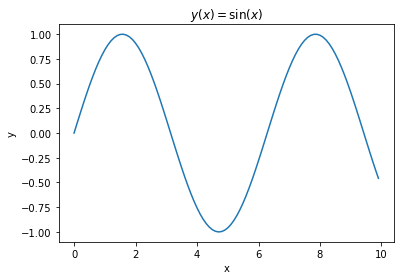

In [36]:
x_array = np.arange(0, 10, 0.1)    # 1d-array from 0 to 10 (excluded) with equal increments 0.1
y_array = np.sin(x_array)    # numpy functions work element-wise on arrays

plt.figure()    # create an empty figure
plt.plot(x_array, y_array)    # plot curve
plt.xlabel('x')    # make x label
plt.ylabel('y')    # make y label
plt.title(r'$y(x) = \sin (x)$')    # 'raw' string has latex support
plt.show()    # show figure